# Learning Objectives

At the end of this class, you will be able to...

- Compute probability density functions and cumulative density functions

- Use the `scipy.stats` package to compute the Survaival Value or CDF Value for a known distribution

In [ ]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Make-School-Courses/DS-1.1-Data-Analysis/master/Notebooks/titanic.csv')

## Normalizing

In statistics and applications of statistics, normalization can have a range of meanings. In the simplest cases, normalization means adjusting values measured on different scales to a notionally common scale, often prior to averaging. In our example we will use normalization to make values be between 0 and 1.

Normalization is applied to make data have a [common scale](https://www.dailysmarty.com/posts/easy-way-to-understand-normalization-in-statistics). 

## Probability Distribution Function (PDF)

- PDFs have a similar pattern to histogram. The only difference is that we _normalize the value of histograms_

- Let's plot the histogram for Age in our Titanic dataset

- To visualize this data, we'll use the [seaborn](https://seaborn.pydata.org/) library

You might be wondering what does the PDF plot actually tell you? 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


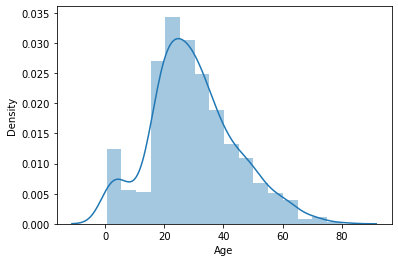

In [ ]:
import seaborn as sns
#kde: Whether to plot a gaussian kernel density estimate.
#a cool website explaining kernel density explanation: https://mathisonian.github.io/kde/
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

- Now let's  plot the PDF of Age in Titanic

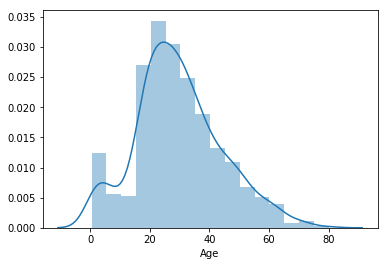

In [ ]:
import seaborn as sns
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

## Activity: In PDFs, where does the y axes numbers come from?

For example, at Age 20, why is the y-value around 0.030?

To normalize we will take counts / total counts / bin size

## Activity: What percent of passengers are younger than 40?

In [ ]:
# Find the number of passengers younger than 40
How_many_younger_40 = df[df['Age'] <= 40]
# Find the percentage of passengers who are younger than 40
# Do this by dividing the number of passengers younger than 40 by the total number of passengers (with an age)
pr_below_40 = len(How_many_younger_40)/len(df['Age'].dropna())
pr_below_40

0.7899159663865546

## It is not easy to calculate this percentage from PDFs as we need to compute the area under the curve

## Cumulative Density Function (CDF)

- In above example, we could not easily obtain the percentage from a PDF, although it is possible.

- This is much easier if we use a CDF. A CDF calculates the probability that a random variable is less than a threshold value

- Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:

    1. Find the minimum value in the array
    1. Set the threshold to be the minimum value of the array
    1. For a given array of numbers and a given threshold, count all of the elements in the array that are less than the threshold, and divide that count by the length of the array
    1. Repeat step three, increasing the threshold by one, until you go through step three where threshold is equail to the maximum value in the array



In [ ]:
ls_age = df['Age'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold
cdf_age = [calculate_cdf(ls_age, r)/len(ls_age) for r in range(int(np.min(ls_age)), int(np.max(ls_age)))]

print(cdf_age)

[0.0, 0.0196078431372549, 0.03361344537815126, 0.04201680672268908, 0.056022408963585436, 0.06162464985994398, 0.06582633053221289, 0.0700280112044818, 0.07563025210084033, 0.08683473389355742, 0.0896358543417367, 0.09523809523809523, 0.09663865546218488, 0.09943977591036414, 0.10784313725490197, 0.11624649859943978, 0.1400560224089636, 0.15826330532212884, 0.19467787114845939, 0.22969187675070027, 0.2507002801120448, 0.2857142857142857, 0.3235294117647059, 0.3445378151260504, 0.38795518207282914, 0.4215686274509804, 0.44677871148459386, 0.47198879551820727, 0.5070028011204482, 0.5378151260504201, 0.572829131652661, 0.5994397759103641, 0.6246498599439776, 0.6484593837535014, 0.6694677871148459, 0.696078431372549, 0.726890756302521, 0.7366946778711485, 0.7521008403361344, 0.7717086834733894, 0.7899159663865546, 0.8011204481792717, 0.819327731092437, 0.8263305322128851, 0.8389355742296919, 0.8557422969187675, 0.8627450980392157, 0.8753501400560224, 0.8879551820728291, 0.896358543417367, 

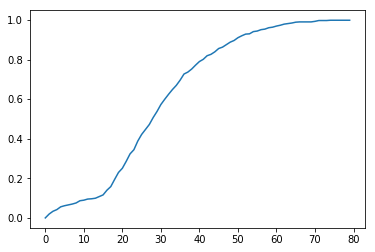

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)

## Normal Distribution

- It is possible that when we plot a histogram or PDF of an array, it has a Bell Shape 

- The name of this histogram is **Normal**

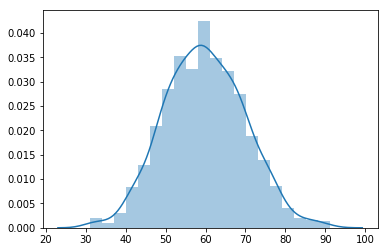

In [ ]:
import numpy as np
import seaborn as sns

# Generate 1000 samples with 60 as its mean and 10 as its std
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

## Normal Distribution Properties:

When the data is Normally distributed:

- 68% of the data is captured within one standard deviation from the mean.
- 95% of the data is captured within two standard deviations from the mean.
- 99.7% of the data is captured within three standard deviations from the mean.

<br><img src="http://www.oswego.edu/~srp/stats/images/normal_34.gif" /><br>

## Activity:

- Show that about 68% of the values are in the [50, 70] range


In [ ]:
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

0.6826894921370859

## Z-Distribution 

- Z-distribution is another name for _standard Normal distribution_

- When the samples of our numerical array are Normal with an arbitrary mean and std

- If scale each element by subtracting elements from the mean, and divide over the std, then the new array would be a Normal distribution with zero mean, and std 1 